In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('datasets/sample.csv')

In [56]:
X = np.array(df['X'])
Y = np.array(df['Y'])

In [57]:
def RMSE(Y, Y_pred):
    Y, Y_pred = np.array(Y), np.array(Y_pred)
    error = (Y_pred - Y)**2
    return np.mean(error)

In [58]:
class LinearRegressionPedhazur:
    def __init__(self):
        self.beta_0 = None
        self.beta_1 = None

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)

        X_mean = np.mean(X)
        Y_mean = np.mean(Y)

        self.beta_1 = (np.sum((X - X_mean) * (Y - Y_mean))) / (np.sum((X - X_mean)**2))
        self.beta_0 = Y_mean - self.beta_1 * X_mean
    
    def predict(self, X):
        X = np.array(X)
        return self.beta_0 + self.beta_1 * X

In [59]:
class LinearRegressionCalculus:
    def __init__(self):
        self.beta_0 = None
        self.beta_1 = None

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)

        n = len(X)
        sum_x = np.sum(X)
        sum_x2 = np.sum(X ** 2)

        sum_y = np.sum(Y)
        sum_xy = np.sum(X*Y)

        MAT1 = np.array([[n, sum_x],[sum_x, sum_x2]])
        MAT2 = np.array([[sum_y],[sum_xy]])

        inv_MAT1 = np.linalg.inv(MAT1)
        self.beta_0, self.beta_1 = (inv_MAT1 @ MAT2).flatten()
    def predict(self, X):
        X = np.array(X)
        return self.beta_0 + self.beta_1 * X

In [60]:
model1 = LinearRegressionPedhazur()
model1.fit(X, Y)
Y_pred = model1.predict(X)
print(f'Coefficients for Pedhazur are ({model1.beta_0}, {model1.beta_1})')
print(f'RMSE for Pedhazur is {RMSE(Y, Y_pred)}')

Coefficients for Pedhazur are (2.2727272727272725, 0.5909090909090909)
RMSE for Pedhazur is 5.020661157024794


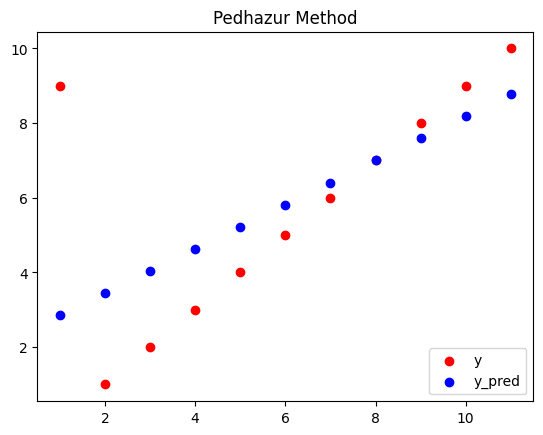

In [61]:
plt.scatter(X, Y, c='red', label='y')
plt.scatter(X, Y_pred, c='blue', label='y_pred')
plt.legend(loc='lower right')
plt.title('Pedhazur Method')
plt.show()

In [62]:
model2 = LinearRegressionCalculus()
model2.fit(X, Y)
Y_pred = model2.predict(X)
print(f'Coefficients for Calculus are ({model1.beta_0}, {model1.beta_1})')
print(f'RMSE for Calculus is {RMSE(Y, Y_pred)}')

Coefficients for Calculus are (2.2727272727272725, 0.5909090909090909)
RMSE for Calculus is 5.020661157024793


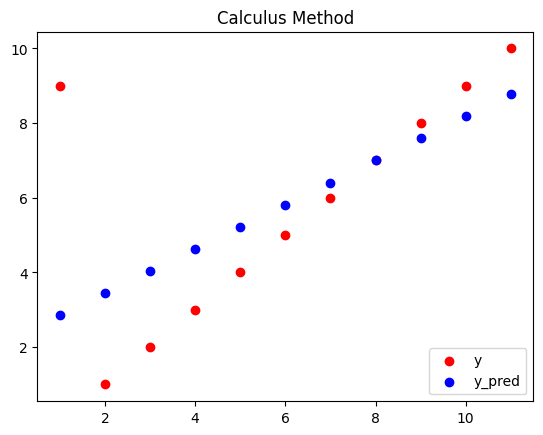

In [63]:
plt.scatter(X, Y, c='red', label='y')
plt.scatter(X, Y_pred, c='blue', label='y_pred')
plt.legend(loc='lower right')
plt.title('Calculus Method')
plt.show()

In [64]:
print(f'Predicted Score when u study for 10hrs using Pedhazur is {model1.predict([10])}')
print(f'Predicted Score when u study for 10hrs using Calculus is {model2.predict([10])}')

Predicted Score when u study for 10hrs using Pedhazur is [8.18181818]
Predicted Score when u study for 10hrs using Calculus is [8.18181818]
